In [55]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
import scipy.io
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn import datasets, linear_model
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split

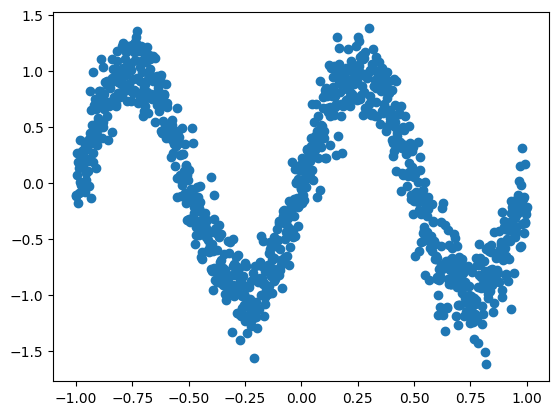

In [74]:

def function(x, f):
  return np.sin(2 * np.pi * f * x)

def N(n, s):
  return s * np.random.randn(n)

f = 1
n = 1000
s = 0.2
X = np.linspace(-1, 1, n)
y = function(X, f) + N(n, s)

plt.scatter(X, y)
plt.show()

In [44]:
cv = KFold(n_splits=5, random_state=1, shuffle=True)
x_train,x_test,y_train,y_test=train_test_split(X,y,train_size=0.9)

In [67]:
x_train = x_train.reshape(-1,1)
x_test = x_test.reshape(-1,1)
lm = LinearRegression()

Text(0, 0.5, 'Erro')

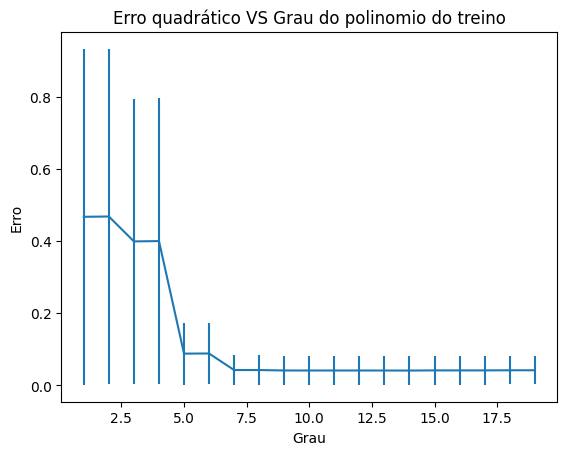

In [100]:
grau_polinomio=20
training_error=[]
testing_error=[]
erro=[]
erro_bytest=[]
for d in range(1,grau_polinomio):
    x_poly_train=PolynomialFeatures(degree=d).fit_transform(x_train)
    x_poly_test=PolynomialFeatures(degree=d).fit_transform(x_test)

    lr=LinearRegression(fit_intercept=False)
    model=model.fit(x_poly_train,y_train)

    y_train_pred=model.predict(x_poly_train)
    y_test_pred=model.predict(x_poly_test)

    mse_train=mean_squared_error(y_train,y_train_pred)
    mse_test=mean_squared_error(y_test,y_test_pred)
    cve=cross_validate(lr,x_poly_train,y_train,scoring='neg_mean_squared_error',cv=cv,return_train_score=True)
    cve_test=cross_validate(lr,x_poly_test,y_test,scoring='neg_mean_squared_error',cv=cv,return_train_score=True)


    training_error.append(mse_train)
    testing_error.append(mse_test)
    erro.append(np.mean(np.absolute(cve['test_score'])))
    erro_bytest.append(np.mean(np.absolute(cve_test['test_score'])))



plt.errorbar(range(1,grau_polinomio), erro, yerr = training_error)
plt.title('Erro quadrático VS Grau do polinomio do treino')
plt.xlabel('Grau')
plt.ylabel('Erro')



Text(0, 0.5, 'Erro')

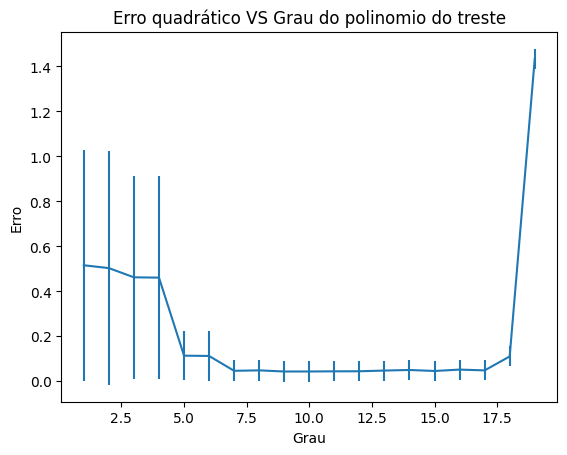

In [99]:

plt.errorbar(range(1,grau_polinomio), erro_bytest, yerr = testing_error)
plt.title('Erro quadrático VS Grau do polinomio do treste')
plt.xlabel('Grau')
plt.ylabel('Erro')

